# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [322]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [323]:
import numpy as np #создадим матрицу, которая используется в нормальном уравнении и заполним ее собственными функциями
def bet(x,y,m):
    A = np.zeros((len(x),m+1))
    for i in range(len(x)):
        for j in range(m+1):
            A[i][j] = x[i]**j
    return np.linalg.solve(A.T@A,A.T@y)


In [324]:
def P(a,x): #создадим степенной полином
    pol = 0
    for i in range(len(a)):
        pol += a[i]*((x)**i)
    return pol

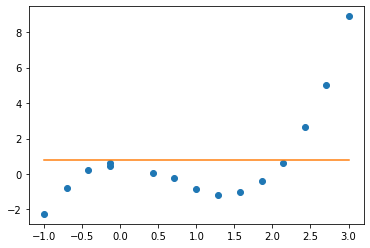

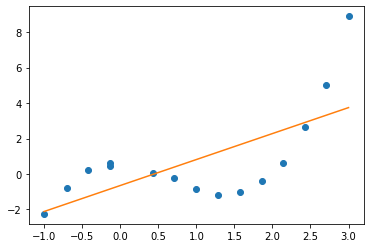

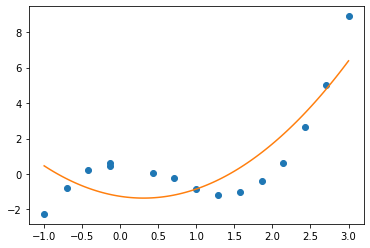

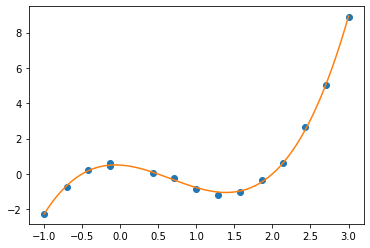

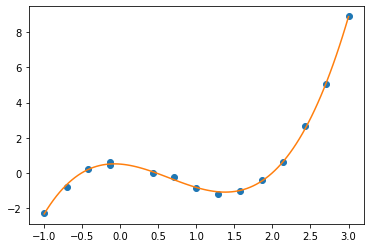

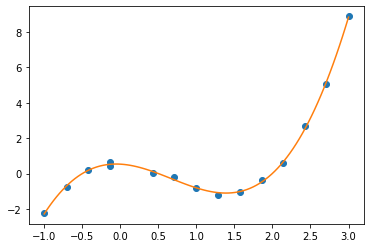

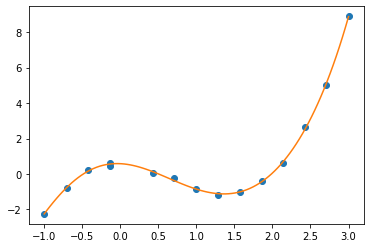

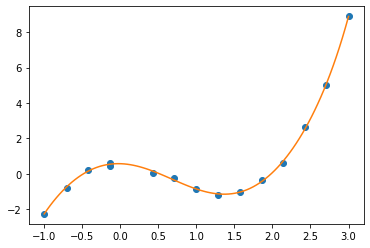

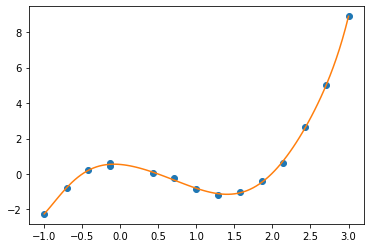

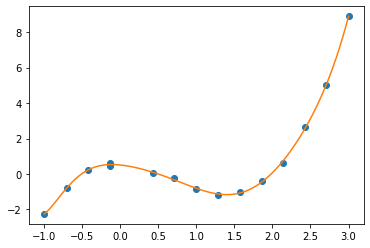

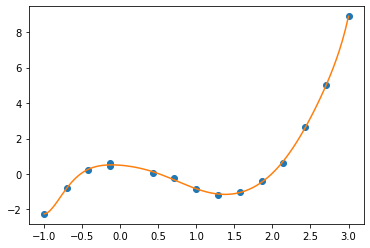

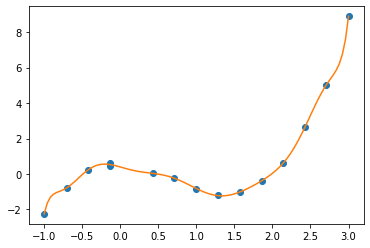

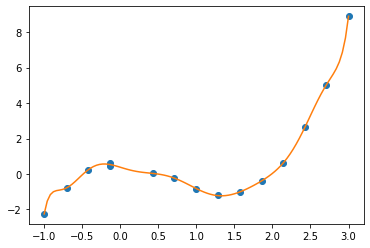

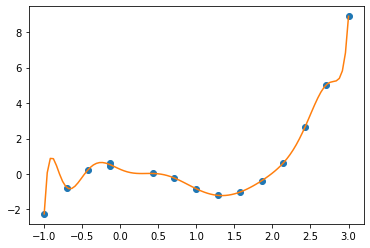

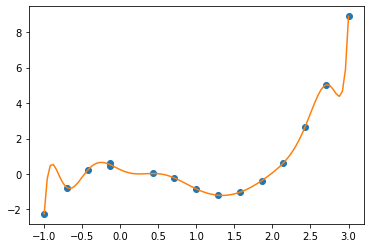

In [325]:
import matplotlib.pyplot as plt #тут собственно будем строить всевозможные варианты m
x0 = np.linspace(-1,3,100)
for m in range(len(x)):
    plt.figure()
    polinom = [P(bet(x,y,m),x0[i]) for i in range(len(x0))]
    plt.plot(x,y,'o',x0,polinom)
    plt.show() #прошу прощения, я еще не научился красиво оформлять графики и работать со всей это штукой()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [326]:
def sigma(m): #тут будем считать наше отклонение
    s = 0
    for i in range(len(x)):
        s += (P(bet(x,y,m),x[i]) - y[i])**2
    return (1/(len(x)-m))*s

In [327]:
error = []
for i in range(len(x)):
    error.append(sigma(i))
#нам хочется посмотреть, на каком этапе точнсть перестает уменьшаться и начинает увеличиваться

In [328]:
print(min(error),error)

0.005379407704380397 [7.495379555555556, 4.4502158667062055, 2.4534269975791787, 0.012470899099731668, 0.01246040758351009, 0.012600059280330662, 0.0115908137006066, 0.012289041756436796, 0.011569371524732317, 0.012931045181871423, 0.01425791959239259, 0.005379407704380397, 0.007129050856043017, 0.010080324443855553, 0.020001895699957264]


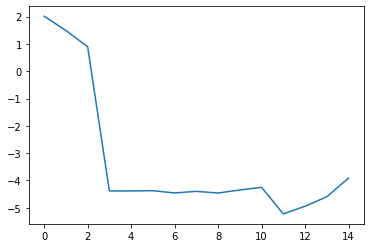

In [329]:
plt.figure() # построим график сигмы(m), как видим, начиная с 3 степени точность почти не меняется, а начиная с 10 резко падает.
#но вернемся к графикам. Из них видно, что после m = 10 графику становится плохо. Это означает, что график уже переборщил
#и ему хватит.Так что на степени больше 10 можно не смотреть. А тогда получается, что все пошло с кубического полинома
#а значит он и победитель в этом споре на определение степени полинома
plt.plot([i for i in range(len(error))], [np.log(error[i]) for i in range(len(error))])

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

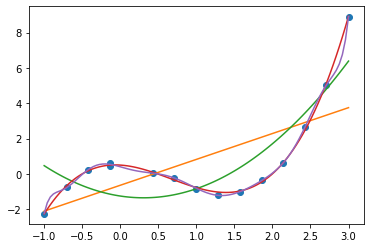

In [330]:
plt.figure()
polinom = [P(bet(x,y,1),x0[i]) for i in range(len(x0))]
plt.plot(x,y,'o',x0,[P(bet(x,y,1),x0[i]) for i in range(len(x0))],x0,[P(bet(x,y,2),x0[i]) for i in range(len(x0))]
        ,x0,[P(bet(x,y,3),x0[i]) for i in range(len(x0))],x0,[P(bet(x,y,11),x0[i]) for i in range(len(x0))])
plt.show()
#Честно, не вижу тут смысла ставить все графики, поэтому поставил сюда те, которые максимально между собой различаются
#то есть не особо будет продуктивно вставлять сюда графики для m = 4,...,10.Так как мы видили, что отклонения у них
#почти все одинаковые, и даже из графиков выше это понятно. И тоже самое для графиков, у которых m>11.
#Мы знаем, что если на 11 уже начинает заметно ломаться, то дальше все еще хуже будет

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [331]:
def matrix(x,y,m): #тут также как и в начале создаем матрицу нормальных функций
    A = np.zeros((len(x),m+1))
    for i in range(len(x)):
        for j in range(m+1):
            A[i][j] = x[i]**j
    return A

In [332]:
Q, R = np.linalg.qr(matrix(x,y,3)) #не знаю, что тут добавить, так как просто переписал то, что было на онлайн - курсе
#все формулы оттуда
f = (Q.T@y)[:4]
R1 = R[:4]
b = np.linalg.solve(R1,f)
print(b - bet(x,y,3)) #разве что могу добавить, что bet(x,y,3) - это вектор beta, который был получен самым первым способом
#и тут я проверил, как хорошо эти два метода работают. Получилосто, что довольно недурно

[-8.60422844e-15 -4.05231404e-15  1.90958360e-14 -6.43929354e-15]


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [333]:
def f(x):
    return np.cos(x)*x**2

In [334]:
def lagr_k(x,x0,k,m): # запишем кф лагранжа, как было написано в лекции
    l_k = 1
    for j in range(m):
        if j != k:
            l_k *= (x - x0[j])/(x0[k] - x0[j])
    return l_k

In [335]:
def f1(x,y,m,x0): # из кф лагранжа соберем теперь полином
    s= 0
    for i in range(m):
        s += y[i]*lagr_k(x,x0,i,m)
    return s

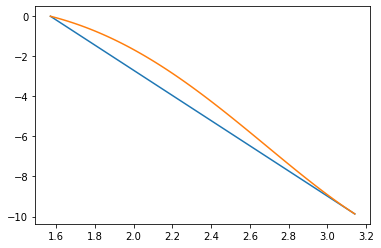

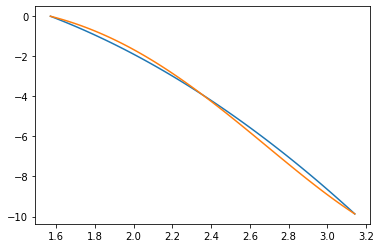

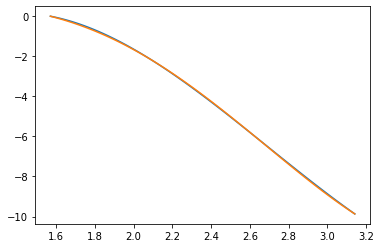

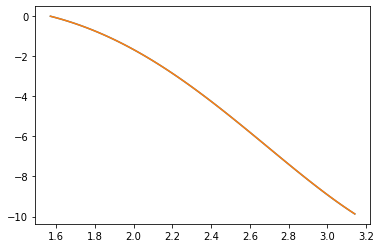

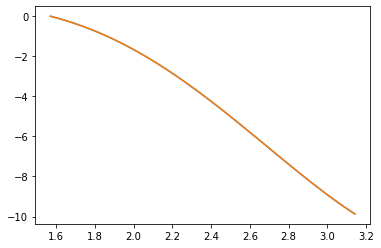

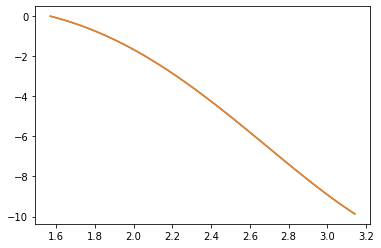

In [336]:
x = np.linspace(np.pi/2,np.pi,100) #тут уже будем сравнивать приближение с реальной функцией
for m in range(1,7):
    X = np.linspace(np.pi/2,np.pi,m+1)
    y = [f(i) for i in X]
    plt.figure()
    plt.plot(x, [f1(x[i],y,m+1,X) for i in range(len(x))],x,[f(x[i]) for i in range(len(x))])
    #как и следовало ожидать до 3 степени тут у нас не будет ничего хорошего. А вот уже кубический многочлен начинает себя
    #неплохо проявлять, но все равно видно, как он отклоняется, чег омежду прочем у 4 степени уже не заметно

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

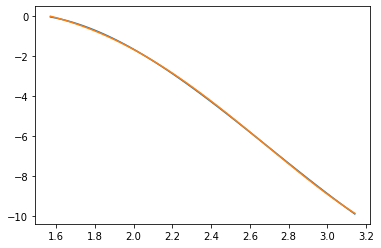

In [337]:
X1 = [] #если в прошлом пункте мы рассматривали это на равномерной сетке, то тут у нас будет у нас чебышевские корни
    #и так как у нас тут система координат изменена, то воспользуемся тогда преобразованием корней
    #про это написано в википедии.
for i in range(1,5):
    X1.append((np.pi/2+np.pi)/2+1/2*(np.pi-np.pi/2)*np.cos((2*i-1)/2/4*np.pi))
y1 = [f(i) for i in X1]
plt.figure()
plt.plot(x, [f1(x[i],y1,4,X1) for i in range(len(x))],x,[f(x[i]) for i in range(len(x))])
# и тут уже почти не заметна разница между нашей подгонкой и реальной функцией
#откуда сейчас можно сделать вывод, что равномерная сетка, конечно,хорошего приближает, но чебышев еще лучше

In [339]:
error =[(f1(x[i],y1,4,X1) - f(x[i]))**2 for i in range(len(x))]
e = np.sum(error)
X2 = np.linspace(np.pi/2,np.pi,4)
y2 = [f(i) for i in X2]
error1 = [(f1(x[i],y2,4,X2) - f(x[i]))**2 for i in range(len(x))]
e1 = np.sum(error1)
e1,e 
#тут я также еще решил посчитать отклонения(e1 - чебышев, е - равномерная сетка). И как видим точность у чебышева на целый 
#порядок выше. Что не может не заслуживать похвалы

(0.10481938979842298, 0.05585845384063701)